**Basic Visualization and Clustering in Python: World Happiness Report**

This kernel shows basic visualization of data using Choropleth maps. Further, it tries to cluster the data using few clustering algorithms including K-means and Guassian Mixture Model based on several factors such as GDP per capita, life expectancy, corruption etc. We have considered 2017 data only.

(참고: https://www.kaggle.com/kernels/scriptcontent/2148091/download)

In [1]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size


In [2]:
wh = pd.read_csv("Documents/Session/Session_08/data/2017.csv") #Read the dataset
wh.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [3]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

**Basic Visualization**

*Correlation among variables*

First, we will try to understand the correlation between few variables. For this, first compute the correlation matrix among the variables and plotted as heat map. 

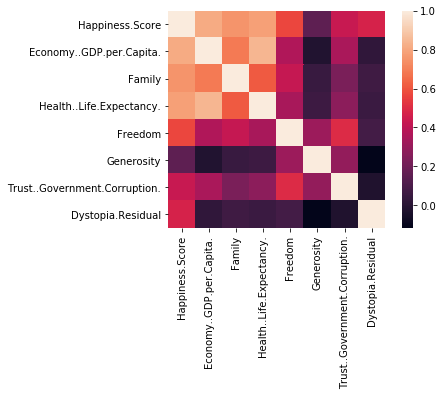

In [4]:
wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map
plt.show()

We have obtained the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation. We can see that happiness score is highly correlated with GDP per capita, family and life expectancy. It is least correlated with generosity. 

*Visualization of Happiness Score: Using Choropleth feature*

We will try to plot the happiness score of countries in the world map. Hovering the mouse over the country shows the name of the country as well as its happiness score. 

In [5]:
#Ref: https://plot.ly/python/choropleth-maps/
#pip install plotly==2.7.0

data = dict(type = 'choropleth', 
           locations = wh['Country'],
           locationmode = 'country names',
           z = wh['Happiness.Score'], 
           text = wh['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

**User-defined function in Python**

Before we proceed further, we will see the basics of defining a function (or user-defined function) in Python: 
1. The user-defined function starts with a keyword def to declare the function and this is followed by adding the function name. 

> def plus

2. Pass the arguments in the function and is provided within parantheses () and close the statement with colon: .

> def plus(x,y):

3. Add the statements that need to be executed. 

> z = sum(x,y)

4. End the function with return statement to see the output. If return statement is not provided, there will be no output. 

> return (z)

So, the complete function is 

>def plus(x,y):

>      z = sum (x,y)

>       return(z)

a = plus(2,5)    #Calling the function to add two numbers

So, whenever we execute a = plus(2,5), it would return a = 7. 

For more details, refer [https://www.datacamp.com/community/tutorials/functions-python-tutorial](https://www.datacamp.com/community/tutorials/functions-python-tutorial)



**Clustering Of Countries**

We are considering eight parameters, namely,  happiness score, GDP per capita, family,  life expectancy, freedom, generosity, corruption and Dystopia residual for clustering the countries. Since the clustering is sensitive to range of data. It is advisable to scale the data before proceeding. 

In [6]:
#Scaling of data
ss = StandardScaler()
X = ss.fit_transform(wh1)

k-means clustering**

In general, k-means is the first choice for clustering because of its simplicity. Here, the user has to define the number of clusters (Post on how to decide the number of clusters would be dealt later). The clusters are formed based on the closeness to the center value of the clusters. The initial center value is chosen randomly.  K-means clustering is top-down approach, in the sense, we decide the number of clusters (k) and then group the data points into k clusters.

In [7]:
X = X[:,[1,6]] #5,10

In [8]:
score=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)


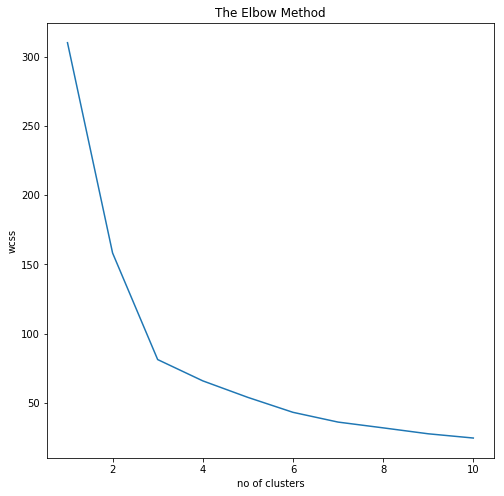

In [9]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


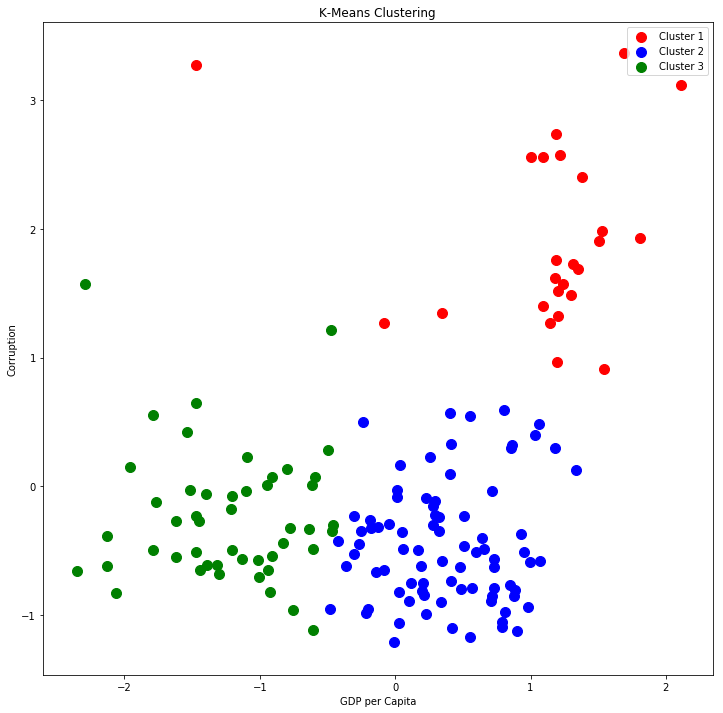

In [11]:
#Plot the clusters obtained using k means
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('K-Means Clustering')
plt.xlabel('GDP per Capita')
plt.ylabel('Corruption')
plt.legend()
plt.show()
